# Projeto Final

## Autoria

- **Nome:** Gabrielly Barcelos Cariman

- **Matrícula:** 2022101409

- **E-mail institucional:** gabrielly.cariman@edu.ufes.br

- **Curso:** Engenharia de Computação

- **Link vídeo:** https://youtu.be/Z3edlC_ubW4

## Introdução

Com a crescente integração da computação em diversos setores da sociedade, a demanda por profissionais em Tecnologia da Informação tem aumentado a cada ano. A pandemia de COVID-19 intensificou essa necessidade, impulsionando uma digitalização em massa de processos e serviços. No entanto, apesar da urgência em atrair mais profissionais para o campo, os cursos superiores de tecnologia enfrentam altos índices de evasão, entre os maiores do Brasil. Além disso, os índices de retenção são preocupantes, refletindo as dificuldades dos estudantes em atender às exigências desses cursos. Esses desafios são barreiras significativas na formação de novos profissionais, contribuindo para a escassez de mão de obra qualificada no mercado.

## Definição do problema

Por isso, o objetivo é realizar um diagnóstico antecipado sobre o desempenho dos estudantes, baseado em seus históricos acadêmicos, prevendo se o aluno vai evadir ou não. Além de buscar identificar o motivo dessa evasão. O estudo envolveu a análise dos históricos curriculares de todos os alunos dos cursos de Engenharia e Ciência da Computação, incluindo egressos, evadidos e ativos.

## Descrição do conjunto de dados

Os dados do Módulo Acadêmico do Sistema de Informação para o Ensino (SIE) da Universidade foram utilizados para desenvolver esse trabalho.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from google.colab import drive, auth, files
drive.mount('/content/drive')
auth.authenticate_user()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer, precision_score, classification_report, recall_score, confusion_matrix
import pickle
import pydotplus
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titulo = "historicos.csv"
fonte = "/content/drive/MyDrive/Classroom/10º Período - 2023 2/Ciência de Dados/trabalhos/" + titulo
df = pd.read_csv(fonte)
df[["ANO_INGRESSO", "ANO"]].describe()

,ANO_INGRESSO,ANO
count,126032.000000,126017.000000
mean,2006.088279,2008.288207
std,8.807023,8.839357
min,1990.000000,1990.000000
25%,1999.000000,2001.000000
50%,2006.000000,2008.000000
75%,2014.000000,2016.000000
max,2023.000000,2023.000000


Os dados abrangem todos os registros acadêmicos dos alunos de Engenharia de Computação e Ciência da Computação, de 1990 a 2023, incluindo resultados de disciplinas cursadas. Esses dados foram extraídos do SIE em formato CSV, totalizando 126.032 linhas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126032 entries, 0 to 126031
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MATR_ALUNO             126032 non-null  int64  
 1   COD_CURSO              126032 non-null  int64  
 2   NOME_UNIDADE           126032 non-null  object 
 3   NUM_VERSAO             126032 non-null  float64
 4   CH_TOTAL_VERSAO_CURSO  126032 non-null  float64
 5   DESCR_ESTRUTURA        125959 non-null  object 
 6   CH_ESTRUTURA           114662 non-null  float64
 7   TIPO_DISCIPLINA        126032 non-null  object 
 8   COD_DISCIPLINA         126032 non-null  object 
 9   NOME_DISCIPLINA        126032 non-null  object 
 10  MEDIA_FINAL            110740 non-null  float64
 11  SITUACAO_ITEM          126032 non-null  float64
 12  SIGLA_SITUACAO         126032 non-null  object 
 13  DESCRICAO_SITUACAO     126032 non-null  object 
 14  SIGLA_SEMESTRE         126024 non-nu

In [ ]:
df.head()

,MATR_ALUNO,COD_CURSO,NOME_UNIDADE,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,DESCR_ESTRUTURA,CH_ESTRUTURA,TIPO_DISCIPLINA,COD_DISCIPLINA,NOME_DISCIPLINA,MEDIA_FINAL,SITUACAO_ITEM,SIGLA_SITUACAO,DESCRICAO_SITUACAO,SIGLA_SEMESTRE,DESCRICAO_SEMESTRE,FORMA_EVASAO,COD_FORMA_EVASAO,ANO_EVASAO,ANO,SEMESTRE_EVASAO,CH_TOTAL,CREDITOS,CH_VALIDA,CRED_VALIDO,CRA,CRN,ANO_INGRESSO,FORMA_INGRESSO,COTISTA
0,0,5,Engenharia de Computação,2008.0,4215.0,Obrigatórias,3450.0,Obrigatória,INF09301,Introdução à Engenharia de Computação,0.0,3.0,RF,Reprovado por Frequência,1.0,1º Semestre,Reopção de Curso,20.0,2012.0,2012.0,2º Semestre,30.0,2.0,0.0,0.0,0.50,5.0,2012.0,Vestibular,N
1,0,5,Engenharia de Computação,2008.0,4215.0,Obrigatórias,3450.0,Obrigatória,ELE08557,Práticas de Laboratório,1.5,3.0,RF,Reprovado por Frequência,1.0,1º Semestre,Reopção de Curso,20.0,2012.0,2012.0,2º Semestre,30.0,1.0,0.0,0.0,0.50,5.0,2012.0,Vestibular,N
2,1,5,Engenharia de Computação,1990.0,3690.0,Obrigatórias,3480.0,Obrigatória,INF02622,PROCESSAMENTO DE DADOS I,5.8,1.0,AP,Aprovado,1.0,1º Semestre,Desistência,9.0,1997.0,1994.0,NaN,60.0,3.0,60.0,3.0,1.94,NaN,1994.0,Vestibular,N
3,1,5,Engenharia de Computação,1990.0,3690.0,Obrigatórias,3480.0,Obrigatória,QUI02621,QUIMICA,8.3,1.0,AP,Aprovado,1.0,1º Semestre,Desistência,9.0,1997.0,1994.0,NaN,75.0,3.0,75.0,3.0,1.94,NaN,1994.0,Vestibular,N
4,1,5,Engenharia de Computação,1990.0,3690.0,Obrigatórias,3480.0,Obrigatória,MAT02620,GEOMETRIA ANALITICA,5.7,1.0,AP,Aprovado,1.0,1º Semestre,Desistência,9.0,1997.0,1994.0,NaN,60.0,3.0,60.0,3.0,1.94,NaN,1994.0,Vestibular,N


As colunas centrais das tabelas compreendem dados fundamentais, tais como a matrícula do aluno, o código do curso, o código da disciplina e a situação do item, indicando se o aluno foi aprovado na disciplina ou não. Adicionalmente, são apresentados dados como o semestre relacionado ao período da matéria, o Coeficiente de Rendimento Acadêmico (CRA), o ano e a forma de ingresso, além da informação sobre se o aluno é cotista.

A coluna 'COD_FORMA_EVASAO' contém os códigos relacionados à evasão, enquanto a coluna 'FORMA_EVASAO' contém os significados em palavras correspondentes aos códigos de evasão.

In [ ]:
df['FORMA_EVASAO'].value_counts(normalize=True)*100

Formado                                        63.015742
Sem evasão                                     13.916307
Desistência                                     6.633236
Desligamento por Abandono                       4.693253
Desligamento: 3 reprovações em 1 disciplina     3.887901
Desligamento: Resolução 68/2017-CEPE            2.962740
Transferido                                     1.331408
Jubilado                                        0.989431
Desligamento: Descumpriu Plano de Estudos       0.746636
Reopção de Curso                                0.720452
Reopção de curso                                0.657769
Erro de cadastro                                0.338803
Falecimento                                     0.038879
Desligamento por mandado judicial               0.032531
Não Informado                                   0.026977
Desligamento                                    0.003967
Nulidade da matrícula - ato administrativo      0.003967
Name: FORMA_EVASAO, dtype: floa

No entanto, existem diversas modalidades de evasão, e o objetivo é prever a evasão, independentemente de seu tipo específico (abandono, reopção de curso, etc.). Para atender a esse propósito, os dados foram agrupados. Dessa forma, foi introduzida uma nova coluna denominada "GRUP_FORMA_EVASAO", na qual os alunos são categorizados como "Formado", "Evadido", "Sem Evasão" e "Outros".

In [ ]:
condicao = [
  (df['COD_FORMA_EVASAO'] == 4), #Formado
  (df['COD_FORMA_EVASAO'] == 1), #Cursando
  #(Evadidos) Desistência, Jubilado, Desligamento por Abandono, Transferido, Reopção de Curso, Desligamento: Descumpriu Plano de Estudos, Desligamento: Resolução 68/2017-CEPE, Reopção de curso
  (df['COD_FORMA_EVASAO'] == 51) | (df['COD_FORMA_EVASAO'] == 10) | (df['COD_FORMA_EVASAO'] == 9) | (df['COD_FORMA_EVASAO'] == 2) | (df['COD_FORMA_EVASAO'] == 20) | (df['COD_FORMA_EVASAO'] == 7) | (df['COD_FORMA_EVASAO'] == 13) | (df['COD_FORMA_EVASAO'] == 53) | (df['COD_FORMA_EVASAO'] == 100),
  #(outros) Falecimento, Não Informado, Desligamento por mandado judicial, Adaptação Curricular, Nulidade da matrícula - ato administrativo
  (df['COD_FORMA_EVASAO'] == 3) | (df['COD_FORMA_EVASAO'] == 99) | (df['COD_FORMA_EVASAO'] == 300) | (df['COD_FORMA_EVASAO'] == 31) | (df['COD_FORMA_EVASAO'] == 400)
  ]
valor = ["Formado", "Cursando", "Evadido", "Outros"] #formado, Cursando, evadido, outros
df["GRUP_FORMA_EVASAO"] = np.select(condicao, valor)

In [ ]:
df['FORMA_INGRESSO'].value_counts(normalize=True)*100

Vestibular                                 77.252603
Sisu                                       13.369620
Reopção de Curso                            4.160848
Transferência Facultativa                   2.869113
Novo Curso                                  0.995779
Convênio                                    0.578425
Transferência Interna                       0.438777
PEC-G                                       0.122985
Transferência ex-oficio (direito legal)     0.101562
Remoção                                     0.056335
Decisão Judicial                            0.038086
Refugiado Político                          0.011108
Mobilidade estudantil internacional         0.004761
Name: FORMA_INGRESSO, dtype: float64

Assim como foi simplificado o tratamento dos dados relacionados à forma de ingresso ao agrupar os diferentes tipos, agora também as formas de ingresso serão agrupadas. As novas categorias serão: Vestibular, Sisu e Outro.

In [ ]:
condicao = [
    # Vestibular
  (df['FORMA_INGRESSO'] == 'Vestibular'),
  # Sisu
  (df['FORMA_INGRESSO'] == 'Sisu'),
  # (Outro) Transferência Facultativa, Reopção de Curso, Novo Curso, Convênio, Transferência Interna, Transferência ex-oficio (direito legal), Decisão Judicial, Refugiado Político
  (df['FORMA_INGRESSO'] != 'Sisu') | (df['FORMA_INGRESSO'] != 'Vestibular')
  ]
valor = ['Vestibular', 'Sisu', 'Outro'] # vestibular, sisu, outro
df['GRUP_FORMA_INGRESSO'] = np.select(condicao, valor)

Na coluna sobre situação na disciplina tem a informação: se o estudante obteve aprovação ou não. Dessa forma, uma nova coluna chamada "GRUP_SITUACAO" com os seguintes: Aprovado e Reprovado para cada disciplina foi adicionada. Isso porque, não faz muita diferença o tipo de repovação ou aprovação para prever evasão.

No entanto, a fim de preservar informações sobre reprovações por frequência, uma coluna adicional foi criada. Nela, o valor 1 é atribuído se o aluno foi reprovado por frequência, e 0 se ele nunca teve reprovação nesse critério.

In [ ]:
condicao = [
  #(aprovado) Aprovado, Aproveitamento de Estudos, Aprovado sem Nota, Amparo Legal, Dispensa com nota, Dispensa sem nota
  (df['SITUACAO_ITEM'] == 1) | (df['SITUACAO_ITEM'] == 11) | (df['SITUACAO_ITEM'] == 8) | (df['SITUACAO_ITEM'] == 19) | (df['SITUACAO_ITEM'] == 7)  | (df['SITUACAO_ITEM'] == 4),
  #(reprovado) Reprovado por Freqüência, Reprovado por Nota, Trancamento de Curso , Disciplina sem Oferta, Cancelada
  (df['SITUACAO_ITEM'] == 3) | (df['SITUACAO_ITEM'] == 2) | (df['SITUACAO_ITEM'] == 12) | (df['SITUACAO_ITEM'] == 13) | (df['SITUACAO_ITEM'] == 5)
  ]
valor = ['Aprovado', 'Reprovado'] #aprovado, reprovado
df["GRUP_SITUACAO"] = np.select(condicao, valor)


condicao = [
  (df['SITUACAO_ITEM'] != 3),
  (df['SITUACAO_ITEM'] == 3)
  ]
valor = [0, 1] #não reprovado, reprovado
df["REPROVOU_FREQUENCIA"] = np.select(condicao, valor)

Algumas colunas serão excluídas devido à falta de informações relevantes ou à duplicidade de dados.

- As colunas COD_CURSO e NOME_UNIDADE contêm informações relacionadas ao curso que a pessoa está cursando. Portanto, a coluna NOME_UNIDADE será removida.

- As colunas DESCR_ESTRUTURA e TIPO_DISCIPLINA trazem informações semelhantes sobre o tipo da disciplina, por exemplo, se é obrigatória ou não. Por isso, DESCR_ESTRUTURA será removida.

- COD_DISCIPLINA e NOME_DISCIPLINA trazem informações sobre qual é a disciplina cursada. Portanto, NOME_DISCIPLINA será removida.

- SITUACAO_ITEM, SIGLA_SITUACAO, DESCRICAO_SITUACAO e GRUP_SITUACAO trazem a mesma informação, que é se o aluno passou ou não. Assim, apenas GRUP_SITUACAO será mantida.

- SIGLA_SEMESTRE e DESCRICAO_SEMESTRE trazem a mesma informação sobre qual é o semestre em que aquela pessoa cursou a disciplina. Portanto, DESCRICAO_SEMESTRE será removido.

- As colunas COD_FORMA_EVASAO e FORMA_EVASAO podem ser removidas da base de dados, porque a coluna GRUP_FORMA_EVASAO já traz a informação sobre forma de evasão.

- GRUP_FORMA_INGRESSO e FORMA_INGRESSO trazem a mesma informação sobre a forma de ingresso do aluno. Por isso, FORMA_INGRESSO será removida.

- CRA e CRN trazem as mesmas informações sobre a nota da pessoa, mas CRN tem mais nulos, por isso vai ser removido.

In [ ]:
df = df.drop(['NOME_UNIDADE', 'DESCR_ESTRUTURA', 'NOME_DISCIPLINA', 'SITUACAO_ITEM', 'SIGLA_SITUACAO', 'DESCRICAO_SITUACAO', 'DESCRICAO_SEMESTRE','COD_FORMA_EVASAO', 'FORMA_EVASAO', 'FORMA_INGRESSO', 'CRN'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126032 entries, 0 to 126031
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MATR_ALUNO             126032 non-null  int64  
 1   COD_CURSO              126032 non-null  int64  
 2   NUM_VERSAO             126032 non-null  float64
 3   CH_TOTAL_VERSAO_CURSO  126032 non-null  float64
 4   CH_ESTRUTURA           114662 non-null  float64
 5   TIPO_DISCIPLINA        126032 non-null  object 
 6   COD_DISCIPLINA         126032 non-null  object 
 7   MEDIA_FINAL            110740 non-null  float64
 8   SIGLA_SEMESTRE         126024 non-null  float64
 9   ANO_EVASAO             108543 non-null  float64
 10  ANO                    126017 non-null  float64
 11  SEMESTRE_EVASAO        93311 non-null   object 
 12  CH_TOTAL               125942 non-null  float64
 13  CREDITOS               125815 non-null  float64
 14  CH_VALIDA              126031 non-nu

In [ ]:
  df.head()

,MATR_ALUNO,COD_CURSO,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,CH_ESTRUTURA,TIPO_DISCIPLINA,COD_DISCIPLINA,MEDIA_FINAL,SIGLA_SEMESTRE,ANO_EVASAO,ANO,SEMESTRE_EVASAO,CH_TOTAL,CREDITOS,CH_VALIDA,CRED_VALIDO,CRA,CRN,ANO_INGRESSO,COTISTA,GRUP_FORMA_EVASAO,GRUP_FORMA_INGRESSO,GRUP_SITUACAO,REPROVOU_FREQUENCIA
0,0,5,2008.0,4215.0,3450.0,Obrigatória,INF09301,0.0,1.0,2012.0,2012.0,2º Semestre,30.0,2.0,0.0,0.0,0.50,5.0,2012.0,N,Evadido,Vestibular,Reprovado,1
1,0,5,2008.0,4215.0,3450.0,Obrigatória,ELE08557,1.5,1.0,2012.0,2012.0,2º Semestre,30.0,1.0,0.0,0.0,0.50,5.0,2012.0,N,Evadido,Vestibular,Reprovado,1
2,1,5,1990.0,3690.0,3480.0,Obrigatória,INF02622,5.8,1.0,1997.0,1994.0,NaN,60.0,3.0,60.0,3.0,1.94,NaN,1994.0,N,Evadido,Vestibular,Aprovado,0
3,1,5,1990.0,3690.0,3480.0,Obrigatória,QUI02621,8.3,1.0,1997.0,1994.0,NaN,75.0,3.0,75.0,3.0,1.94,NaN,1994.0,N,Evadido,Vestibular,Aprovado,0
4,1,5,1990.0,3690.0,3480.0,Obrigatória,MAT02620,5.7,1.0,1997.0,1994.0,NaN,60.0,3.0,60.0,3.0,1.94,NaN,1994.0,N,Evadido,Vestibular,Aprovado,0


É crucial destacar que a estrutura original da base de dados é tal que cada linha corresponde a uma disciplina cursada por um estudante. Como resultado, há múltiplas entradas para um mesmo estudante, mais de uma linha com o mesmo número de matrícula, refletindo as diferentes disciplinas que ele cursou, e podendo haver repetição de linhas para a mesma disciplina em caso de reprovação. Essa organização implica que um estudante que tenha concluído mais disciplinas terá um número maior de entradas na base de dados em comparação com um estudante que tenha abandonado o curso no meio do percurso.

Entretanto, considerando o objetivo de prever a evasão dos estudantes, é mais conveniente lidar com os dados se cada linha representar um estudante. Essa abordagem simplifica a análise, uma vez que a base de dados passa a refletir de maneira mais direta o cenário real em termos da quantidade de alunos, assim se tornando mais representativa para os propósitos da análise.

Para unificar a base de dados de modo que cada linha represente um indivíduo distinto, foi necessário realizar uma transformação através da agregação dos dados pela Matrícula de Estudante. No entanto, ao realizar essa agregação, é essencial observar que todas as informações específicas sobre aquela disciplina em particular serão perdidas. Ou seja, as colunas CH_ESTRUTURA, TIPO_DISCIPLINA, COD_DISCIPLINA, MEDIA_FINAL, SIGLA_SEMESTRE, CH_TOTAL, CREDITOS, CH_VALIDA, CRED_VALIDO e GRUP_SITUACAO, que se referem exclusivamente à disciplina cursada, deixarão de ter relevância e precisam ser removidas.

Visando preservar essas informações, ainda que de maneira simplificada, o cálculo anual da quantidade de disciplinas reprovadas, aprovadas e do total de disciplinas cursadas (soma das duas anteriores) utilizando a coluna "GRUP_SITUACAO". A partir desses dados, foi criada uma nova coluna ao dividir o número de disciplinas reprovadas pelo número total de disciplinas cursadas em cada ano. Além disso, também foi calculado o tempo total de graduação em anos para cada estudante.

Por fim, realizou-se o cálculo do número de matérias não aprovadas, aprovadas e do total de matérias cursadas (soma das duas anteriores) por área de conhecimento, abrangendo matemática, informática, física e elétrica. Essa informação foi igualmente utilizada para calcular uma nova coluna de taxa de reprovação por área de conhecimento, simplesmente dividindo a quantidade de disciplinas reprovadas pela quantidade total de disciplinas cursadas.

In [ ]:
def calcula_tempo_graduacao(df):
  df_resetado = df.reset_index(drop=True)
  max_ano_index = df_resetado['ANO'].idxmax()
  min_ano_index = df_resetado['ANO'].idxmin()
  if df_resetado.loc[min_ano_index, 'ANO'] == 0:
    df_resetado = df_resetado.drop(df_resetado[df_resetado['ANO'] == 0].index).reset_index(drop=True)
    min_ano_index = df_resetado['ANO'].idxmin()
  sigla_semestre_min_ano = df_resetado.loc[min_ano_index, 'SIGLA_SEMESTRE']
  sigla_semestre_max_ano = df_resetado.loc[max_ano_index, 'SIGLA_SEMESTRE']
  max_ano = df_resetado['ANO'].max() if (df_resetado['ANO'].max() >= df_resetado['ANO_EVASAO'].values[0]) else (df_resetado['ANO_EVASAO'].values[0])
  min_ano = df_resetado['ANO_INGRESSO'].values[0]
  min_ano = df_resetado['ANO'].min() if ((max_ano - min_ano) < 0) else (df_resetado['ANO_INGRESSO'].values[0])
  if sigla_semestre_min_ano == 1 and sigla_semestre_max_ano == 2:
    df_resetado['TEMPO_GRADUACAO'] = (max_ano - min_ano) + 1
  elif (sigla_semestre_min_ano == 1 and sigla_semestre_max_ano == 1) or (sigla_semestre_min_ano == 2 and sigla_semestre_max_ano == 2):
    df_resetado['TEMPO_GRADUACAO'] = (max_ano - min_ano) + 0.5
  else:
    df_resetado['TEMPO_GRADUACAO'] = (max_ano - min_ano)
  return df_resetado


def calcula_quantidade_aprovacao_reprovacao(df):
  qnt_aprovacao = df[df["GRUP_SITUACAO"] == 'Reprovado'].count()[0]
  qnt_reprovacao = df[df["GRUP_SITUACAO"] == 'Aprovado'].count()[0]
  return qnt_aprovacao, qnt_reprovacao


def separa_aprovacoes_repovacoes_anos(df):
  df_ano1 = df.loc[(df['ANO'] - df['ANO_INGRESSO']) == 0]
  df_ano2 = df.loc[(df['ANO'] - df['ANO_INGRESSO']) == 1]
  df_ano3 = df.loc[(df['ANO'] - df['ANO_INGRESSO']) == 2]
  df_ano4 = df.loc[(df['ANO'] - df['ANO_INGRESSO']) == 3]
  df_ano5 = df.loc[(df['ANO'] - df['ANO_INGRESSO']) == 4]
  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ano1)
  df['TOTAL_REPROVACAO_ANO1'] = qnt_reprovacao
  df['TOTAL_APROVACAO_ANO1'] = qnt_aprovacao
  df['TOTAL_CURSADA_ANO1'] = qnt_aprovacao + qnt_reprovacao

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ano2)
  df['TOTAL_REPROVACAO_ANO2'] = qnt_reprovacao
  df['TOTAL_APROVACAO_ANO2'] = qnt_aprovacao
  df['TOTAL_CURSADA_ANO2'] = qnt_aprovacao + qnt_reprovacao

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ano3)
  df['TOTAL_REPROVACAO_ANO3'] = qnt_reprovacao
  df['TOTAL_APROVACAO_ANO3'] = qnt_aprovacao
  df['TOTAL_CURSADA_ANO3'] = qnt_aprovacao + qnt_reprovacao

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ano4)
  df['TOTAL_REPROVACAO_ANO4'] = qnt_reprovacao
  df['TOTAL_APROVACAO_ANO4'] = qnt_aprovacao
  df['TOTAL_CURSADA_ANO4'] = qnt_aprovacao + qnt_reprovacao

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ano5)
  df['TOTAL_REPROVACAO_ANO5'] = qnt_reprovacao
  df['TOTAL_APROVACAO_ANO5'] = qnt_aprovacao
  df['TOTAL_CURSADA_ANO5'] = qnt_aprovacao + qnt_reprovacao


def separa_aprovacoes_repovacoes_departamentos(df):
  df_aux = df['COD_DISCIPLINA'].str.split(r"T|N|S|L", n = 1, expand = True)
  df['DEPARTAMENTO'] = df_aux[0]
  df_mat = df[df['DEPARTAMENTO'] == 'MA']
  df_inf = df[df['DEPARTAMENTO'] == 'I']
  df_fis = df[df['DEPARTAMENTO'] == 'FI']
  df_ele = df[df['DEPARTAMENTO'] == 'E']

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_mat)
  df['REPROVADA_POR_CURSADA_MAT'] = qnt_reprovacao/(qnt_aprovacao + qnt_reprovacao)

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_inf)
  df['REPROVADA_POR_CURSADA_INF'] = qnt_reprovacao/(qnt_aprovacao + qnt_reprovacao)

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_fis)
  df['REPROVADA_POR_CURSADA_FIS'] = qnt_reprovacao/(qnt_aprovacao + qnt_reprovacao)

  qnt_aprovacao, qnt_reprovacao = calcula_quantidade_aprovacao_reprovacao(df_ele)
  df['REPROVADA_POR_CURSADA_ELE'] = qnt_reprovacao/(qnt_aprovacao + qnt_reprovacao)

  df = df.drop(columns='DEPARTAMENTO')


def unifica_alunos(df_list):
  df_unificado = df_list[0].head(0).copy()
  for df_index in df_list:
    df_resetado = df_index.reset_index(drop=True)
    df_unificado.loc[len(df_unificado)] = list(df_resetado.iloc[df_resetado['ANO'].idxmax()])
  return df_unificado


def calcula_reprovacao_por_total(df, coluna_reprovacao, coluna_total, coluna_reprovacao_por_total):
  df[coluna_reprovacao_por_total] = df[coluna_reprovacao] / df[coluna_total]


def separa_reprovacao_por_total(df):
  calcula_reprovacao_por_total(df, 'TOTAL_REPROVACAO_ANO1', 'TOTAL_CURSADA_ANO1', 'REPROVACAO_POR_CURSADA_ANO1')
  calcula_reprovacao_por_total(df, 'TOTAL_REPROVACAO_ANO2', 'TOTAL_CURSADA_ANO2', 'REPROVACAO_POR_CURSADA_ANO2')
  calcula_reprovacao_por_total(df, 'TOTAL_REPROVACAO_ANO3', 'TOTAL_CURSADA_ANO3', 'REPROVACAO_POR_CURSADA_ANO3')
  calcula_reprovacao_por_total(df, 'TOTAL_REPROVACAO_ANO4', 'TOTAL_CURSADA_ANO4', 'REPROVACAO_POR_CURSADA_ANO4')
  calcula_reprovacao_por_total(df, 'TOTAL_REPROVACAO_ANO5', 'TOTAL_CURSADA_ANO5', 'REPROVACAO_POR_CURSADA_ANO5')

df_list = []
matr_groups = df.groupby("MATR_ALUNO")
for matr, matr_data in matr_groups:
    matr_data = calcula_tempo_graduacao(matr_data)
    separa_aprovacoes_repovacoes_anos(matr_data)
    separa_aprovacoes_repovacoes_departamentos(matr_data)
    df_list.append(matr_data)

df = unifica_alunos(df_list)
separa_reprovacao_por_total(df)

df = df.drop(['CH_ESTRUTURA', 'TIPO_DISCIPLINA', 'COD_DISCIPLINA', 'MEDIA_FINAL', 'SIGLA_SEMESTRE', 'CH_TOTAL', 'CREDITOS', 'CH_VALIDA', 'CRED_VALIDO', 'GRUP_SITUACAO'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 2828
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MATR_ALUNO                   2829 non-null   int64  
 1   COD_CURSO                    2829 non-null   int64  
 2   NUM_VERSAO                   2829 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO        2829 non-null   float64
 4   ANO_EVASAO                   2346 non-null   float64
 5   ANO                          2829 non-null   float64
 6   SEMESTRE_EVASAO              1982 non-null   object 
 7   CRA                          2829 non-null   float64
 8   CRN                          1913 non-null   float64
 9   ANO_INGRESSO                 2829 non-null   float64
 10  COTISTA                      2829 non-null   object 
 11  GRUP_FORMA_EVASAO            2829 non-null   object 
 12  GRUP_FORMA_INGRESSO          2829 non-null   object 
 13  REPROVOU_FREQUENCI

,MATR_ALUNO,COD_CURSO,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,ANO_EVASAO,ANO,SEMESTRE_EVASAO,CRA,CRN,ANO_INGRESSO,COTISTA,GRUP_FORMA_EVASAO,GRUP_FORMA_INGRESSO,REPROVOU_FREQUENCIA,TEMPO_GRADUACAO,TOTAL_REPROVACAO_ANO1,TOTAL_APROVACAO_ANO1,TOTAL_CURSADA_ANO1,TOTAL_REPROVACAO_ANO2,TOTAL_APROVACAO_ANO2,TOTAL_CURSADA_ANO2,TOTAL_REPROVACAO_ANO3,TOTAL_APROVACAO_ANO3,TOTAL_CURSADA_ANO3,TOTAL_REPROVACAO_ANO4,TOTAL_APROVACAO_ANO4,TOTAL_CURSADA_ANO4,TOTAL_REPROVACAO_ANO5,TOTAL_APROVACAO_ANO5,TOTAL_CURSADA_ANO5,DEPARTAMENTO,REPROVADA_POR_CURSADA_MAT,REPROVADA_POR_CURSADA_INF,REPROVADA_POR_CURSADA_FIS,REPROVADA_POR_CURSADA_ELE,REPROVACAO_POR_CURSADA_ANO1,REPROVACAO_POR_CURSADA_ANO2,REPROVACAO_POR_CURSADA_ANO3,REPROVACAO_POR_CURSADA_ANO4,REPROVACAO_POR_CURSADA_ANO5
0,0,5,2008.0,4215.0,2012.0,2012.0,2º Semestre,0.50,5.0000,2012.0,N,Evadido,Vestibular,1,0.5,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,I,NaN,0.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,5,1990.0,3690.0,1997.0,1996.0,NaN,1.94,NaN,1994.0,N,Evadido,Vestibular,1,4.0,6,4,10,0,9,9,0,3,3,0,0,0,0,0,0,I,0.2,0.2,0.2,NaN,0.600000,0.0,0.00,NaN,NaN
2,2,5,1990.0,3690.0,2010.0,2010.0,2º Semestre,8.52,16.2378,2006.0,N,Formado,Vestibular,0,4.5,11,0,11,12,0,12,10,0,10,13,0,13,13,0,13,E,1.0,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.0
3,3,5,1990.0,3690.0,1994.0,1992.0,NaN,0.00,NaN,1991.0,N,Evadido,Vestibular,1,3.0,0,2,2,0,2,2,0,0,0,0,0,0,0,0,0,EBR02684,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
4,4,5,1990.0,3690.0,1996.0,1996.0,NaN,2.60,NaN,1993.0,N,Evadido,Outro,0,3.0,35,1,36,0,3,3,1,3,4,0,2,2,0,0,0,E,1.0,0.8,1.0,0.833333,0.972222,0.0,0.25,0.0,NaN


### Distribuição dos Dados


Ao analisar os dados sobre a admissão de estudantes nos cursos de Engenharia e Ciência da Computação, notamos desequilíbrios significativos em relação ao processo seletivo e à proporção de cotistas. Quanto à forma de ingresso, 71,19% dos alunos foram admitidos via Vestibular, 19,05% através do Sisu, e os 9,76% restantes por outros meios. Este padrão é em grande parte devido à adesão da Universidade ao Sisu apenas em 2017.

Vestibular    71.191234
Sisu          19.052669
Outro          9.756098
Name: GRUP_FORMA_INGRESSO, dtype: float64

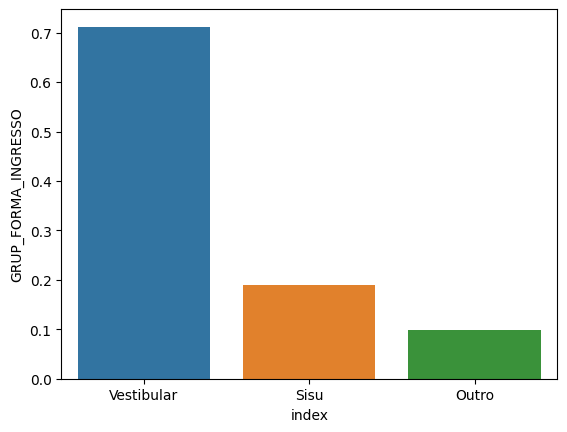

In [ ]:
variavel = 'GRUP_FORMA_INGRESSO'
df_proporcoes = df[variavel].value_counts(normalize=True, sort=True).reset_index()
sns.barplot(x='index', y=variavel, data=df_proporcoes)
df[variavel].value_counts(normalize=True)*100

Em relação à distribuição de cotistas e não cotistas, observa-se um desequilíbrio, apesar de a Universidade reservar 50% das vagas para alunos de escolas públicas, incluindo cotas para Pretos, Pardos e Indígenas (PPI). As políticas de cotas foram implementadas em 2008, resultando em 82,50% de não cotistas e 17,49% de cotistas entre os estudantes.

N    82.502651
S    17.497349
Name: COTISTA, dtype: float64

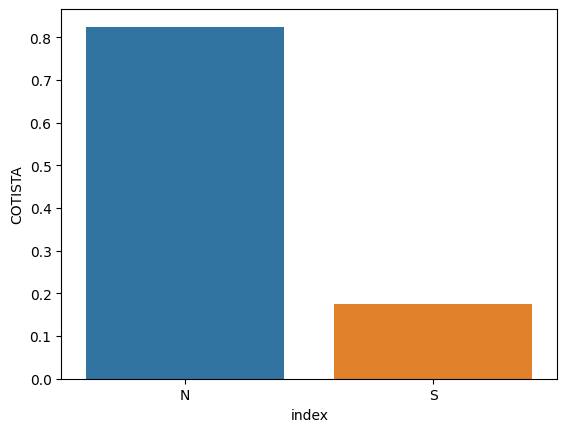

In [ ]:
variavel = 'COTISTA'
df_proporcoes = df[variavel].value_counts(normalize=True, sort=True).reset_index()
sns.barplot(x='index', y=variavel, data=df_proporcoes)
df[variavel].value_counts(normalize=True)*100

Considerando os grupos de evasão, encontramos uma distribuição quase equitativa entre os alunos que não estão mais ativos. Os formados constituem 45,06%, os evadidos 37,87%, os sem evasão 16,93% e outros 0,14%

Formado     45.068929
Evadido     37.857900
Cursando    16.931778
Outros       0.141393
Name: GRUP_FORMA_EVASAO, dtype: float64

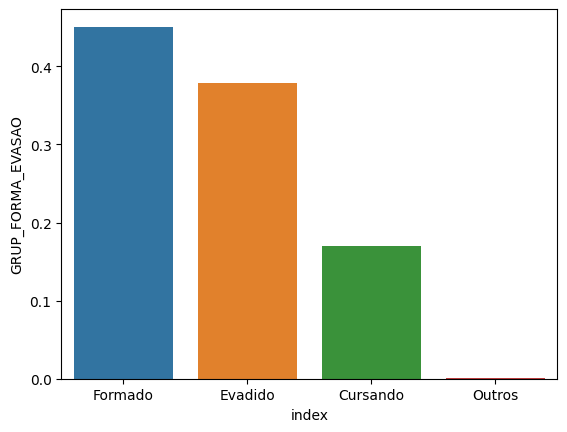

In [ ]:
variavel = 'GRUP_FORMA_EVASAO'
df_proporcoes = df[variavel].value_counts(normalize=True, sort=True).reset_index()
sns.barplot(x='index', y=variavel, data=df_proporcoes)
df[variavel].value_counts(normalize=True)*100

A análise do desempenho dos alunos nas disciplinas revela que 82,18% não foram reprovados por frequência, enquanto 17,81% foram reprovados pelo menos uma vez por frequência.

0    82.184517
1    17.815483
Name: REPROVOU_FREQUENCIA, dtype: float64

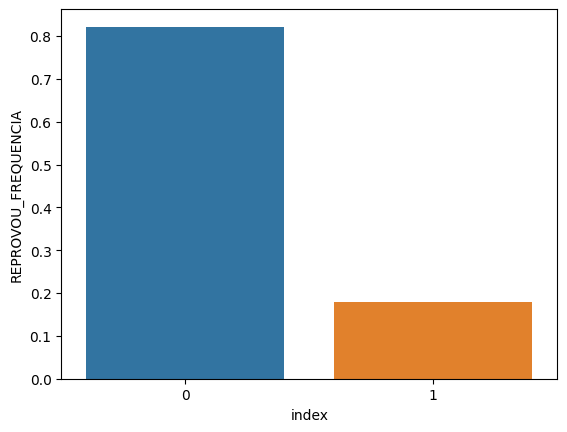

In [ ]:
variavel = 'REPROVOU_FREQUENCIA'
df_proporcoes = df[variavel].value_counts(normalize=True, sort=True).reset_index()
sns.barplot(x='index', y=variavel, data=df_proporcoes)
df[variavel].value_counts(normalize=True)*100

Os dados de reprovação por disciplinas cursadas apresentam uma distribuição assimétrica à direita, concentrando a maioria dos dados próximos a zero, com alguns casos extremos de reprovação elevada. Isso resulta em uma média mais alta que a mediana, indicando que enquanto a maioria dos estudantes reprova em poucas disciplinas, alguns poucos reprovam em muitas.
Já a coluna CRA apresenta mais uma distribuição assimétrica à esquerda, concentrando a maioria dos dados próximos a 10. Isso indica que a maioria dos estudantes tem CRA maior do 5.

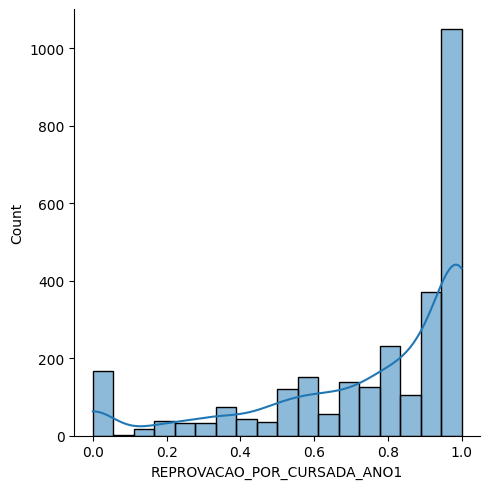

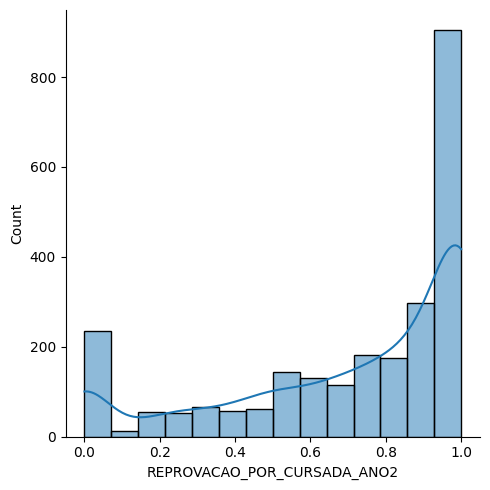

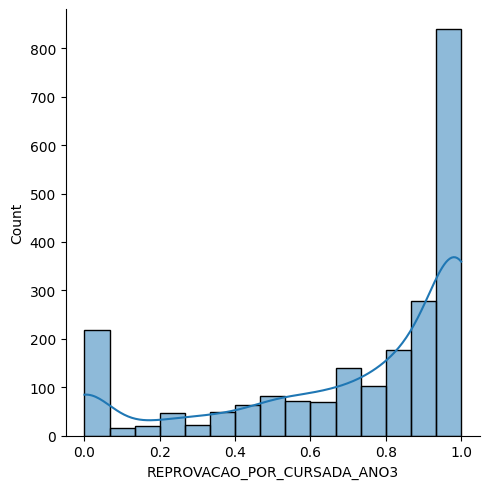

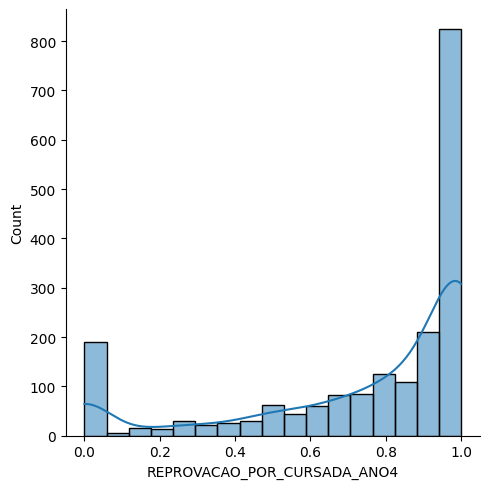

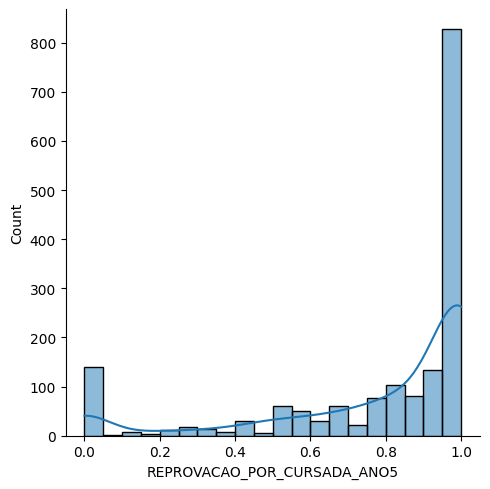

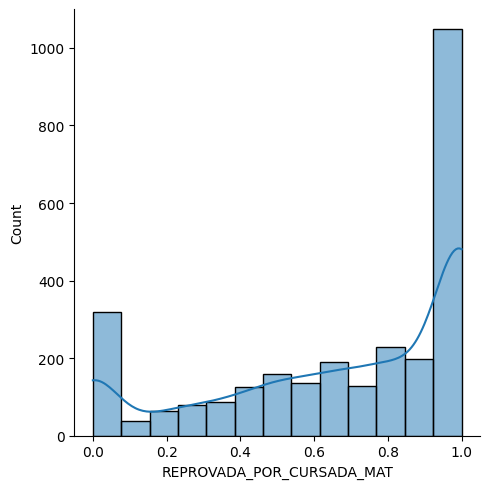

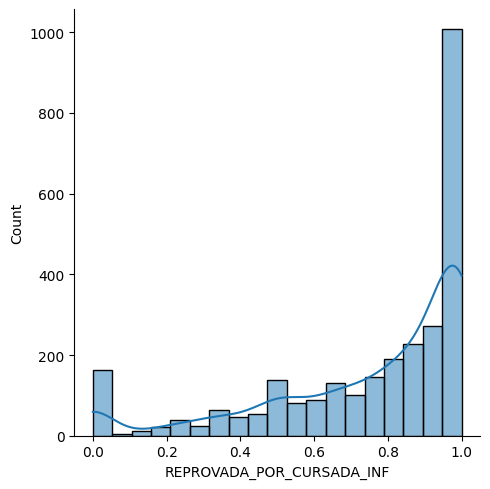

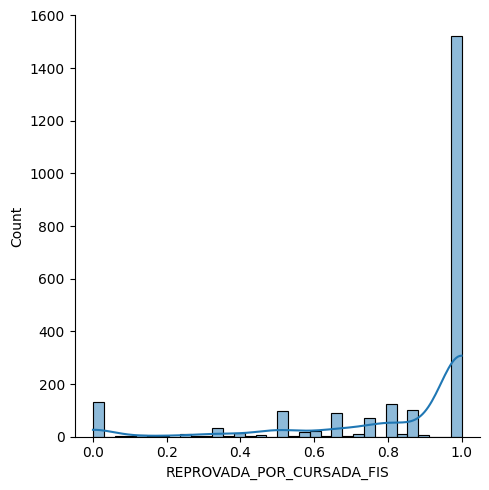

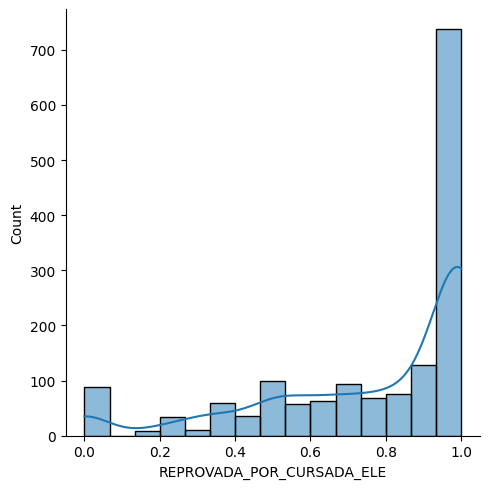

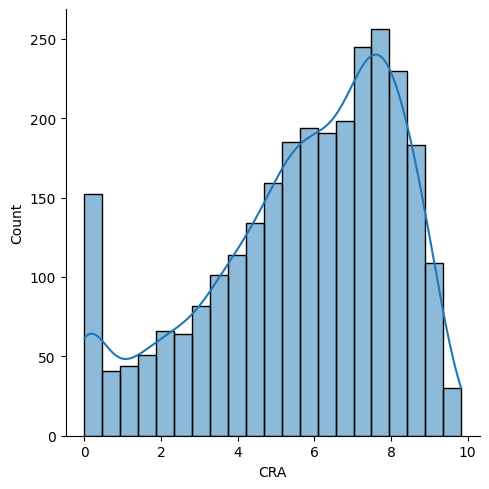

In [ ]:
sns.displot(df, x="REPROVACAO_POR_CURSADA_ANO1", kde=True)

sns.displot(df, x="REPROVACAO_POR_CURSADA_ANO2", kde=True)

sns.displot(df, x="REPROVACAO_POR_CURSADA_ANO3", kde=True)

sns.displot(df, x="REPROVACAO_POR_CURSADA_ANO4", kde=True)

sns.displot(df, x="REPROVACAO_POR_CURSADA_ANO5", kde=True)

sns.displot(df, x="REPROVADA_POR_CURSADA_MAT", kde=True)

sns.displot(df, x="REPROVADA_POR_CURSADA_INF", kde=True)

sns.displot(df, x="REPROVADA_POR_CURSADA_FIS", kde=True)

sns.displot(df, x="REPROVADA_POR_CURSADA_ELE", kde=True)

sns.displot(df, x="CRA", kde=True)
plt.show()

Por fim, os dados calculados para o tempo de graduação apenas para os alunos formados e evadidos, que não podem aumentar o tempo de graduação, também mostram uma distribuição assimétrica à direita. A mediana do tempo de graduação para os que se formaram é de 5 anos e meio, enquanto para os que evadiram é de 3 anos e meio. Isso indica que a maioria dos estudantes que abandonam o curso fazem isso em menos de 5 anos. Alguns estudantes que se formaram em menos tempo do que o estipulado podem ter aproveitado disciplinas cursadas anteriormente em outra instituição.

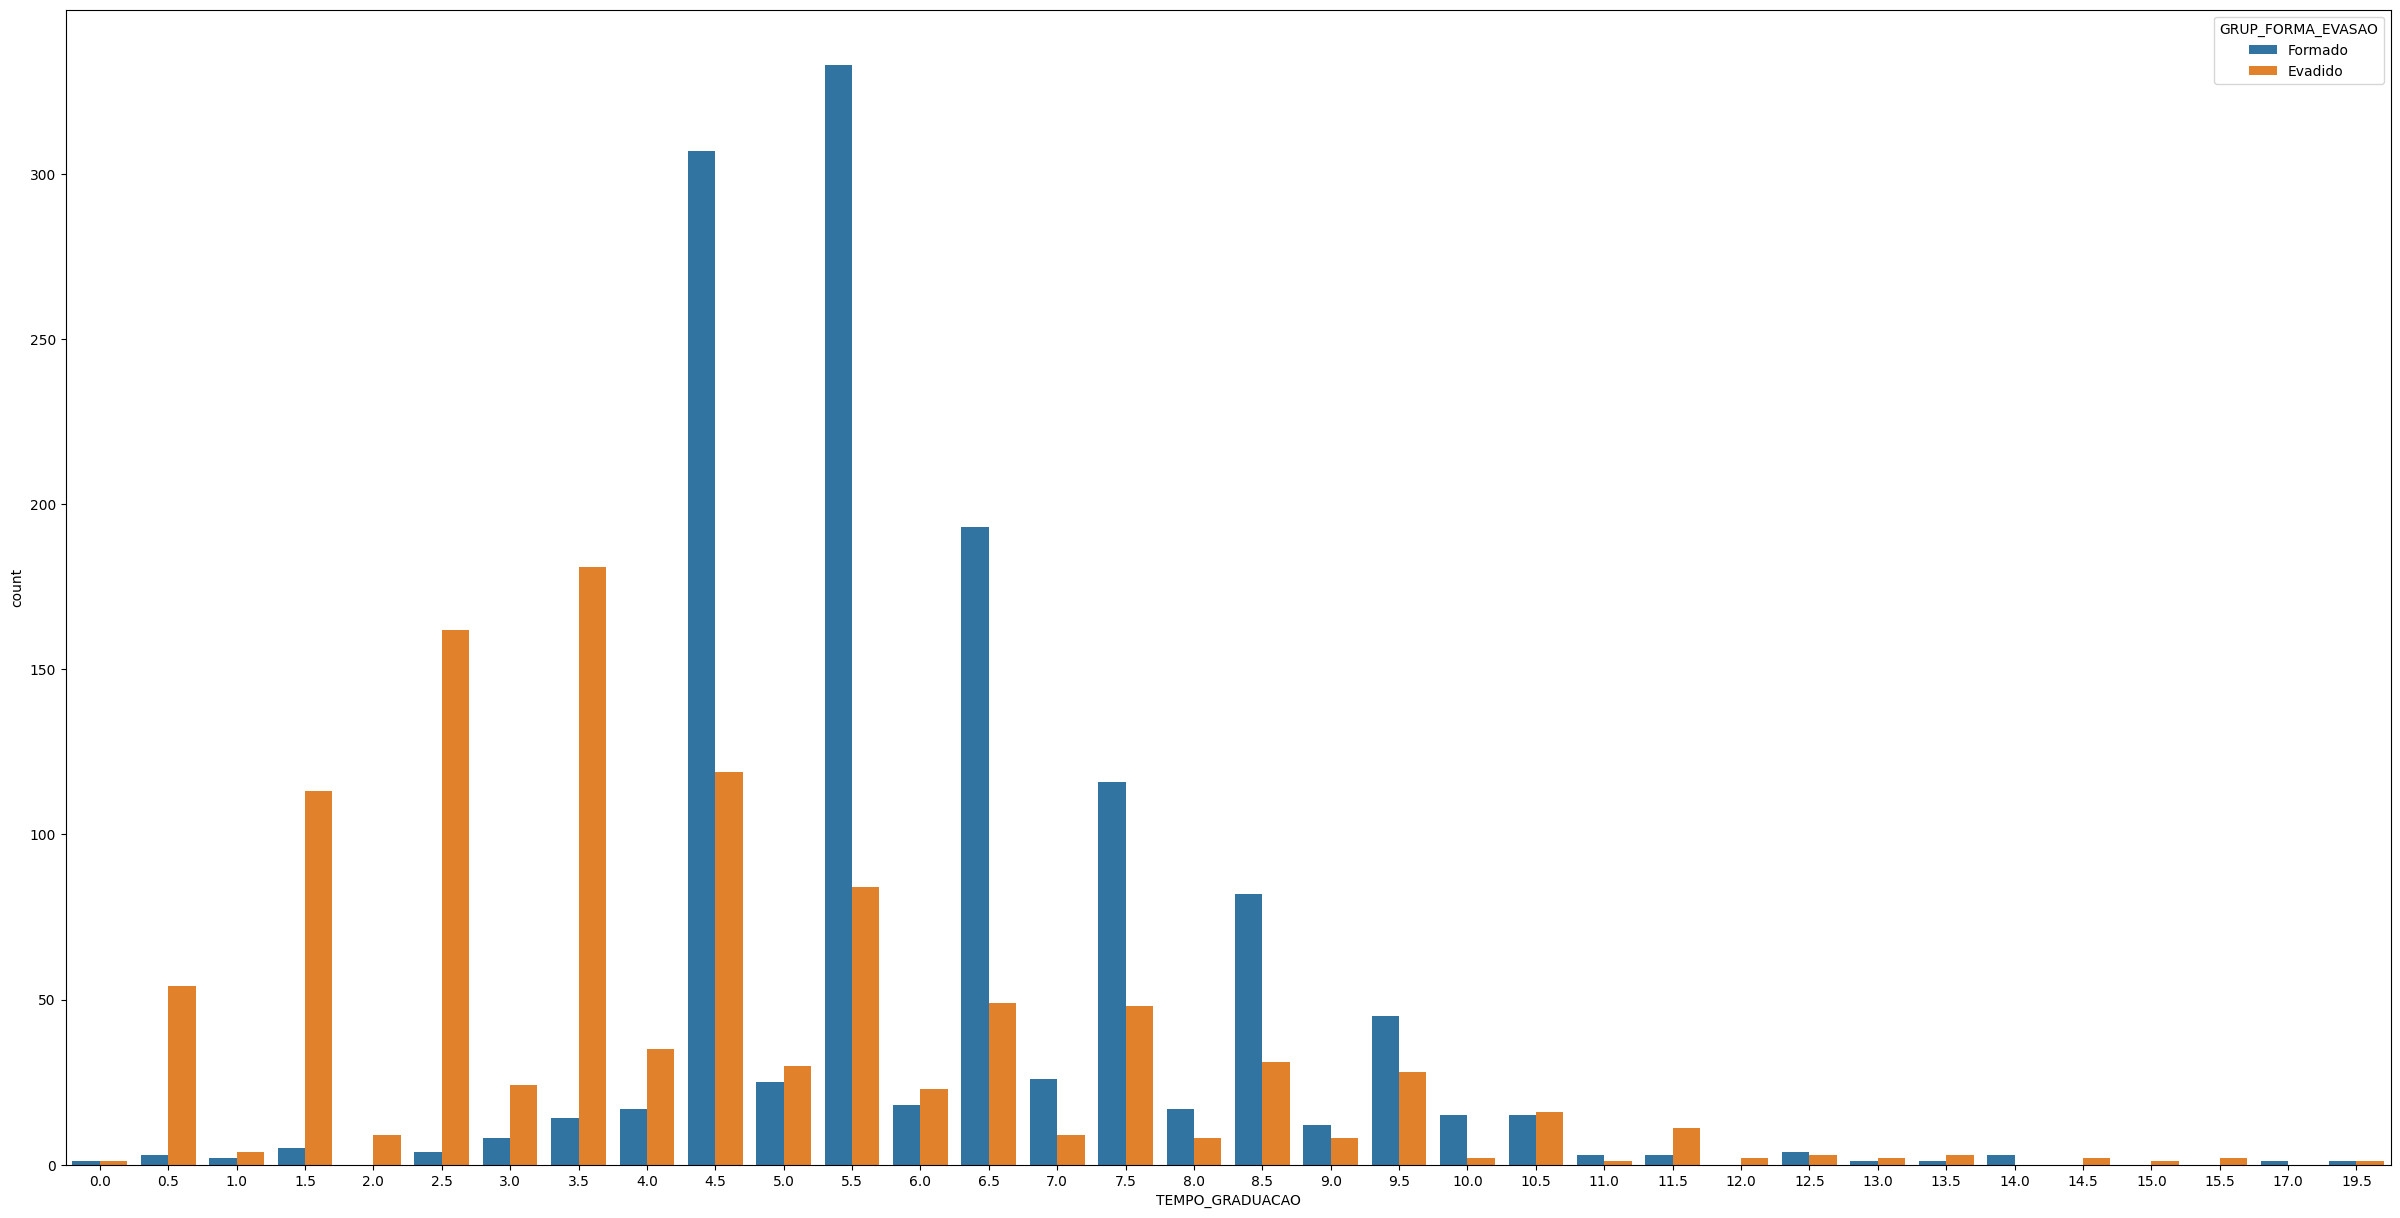

In [ ]:
def separa_formado_evadido(df):
  df_formado = df[df['GRUP_FORMA_EVASAO'] == 'Formado'] #Fomado
  df_sem_evasao = df[df['GRUP_FORMA_EVASAO'] == 'Cursando'] #Sem evasão
  df_evadido = df[df['GRUP_FORMA_EVASAO'] == 'Evadido']
  return df_formado, df_evadido, df_sem_evasao

def separa_base_modelagem(df):
  df_formado, df_evadido, df_sem_evasao = separa_formado_evadido(df)
  df_concat = pd.concat([df_formado, df_evadido])
  return df_concat

df_formado_evadido = separa_base_modelagem(df)
plt.figure(figsize = (30,15))
ax = sns.countplot(x="TEMPO_GRADUACAO", hue="GRUP_FORMA_EVASAO", data=df_formado_evadido)

## Metodologia

In [ ]:
from google.colab import drive, auth, files
drive.mount('/content/drive')
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
!pip install odfpy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer, precision_score, classification_report, recall_score, confusion_matrix, accuracy_score
import pickle
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
# Importando as bibliotecas de modelagem
from sklearn.linear_model import LogisticRegression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=d2a68c88326576118802103b3624ec60c9556d9b5b51346b1051a52af74d5d21
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


As colunas de disiciplinas reprovadas por cursadas já trazem informações do total de disciplinas aprovadas e cursadas, por isso elas serão removidas.

In [ ]:
df = df.drop(['TOTAL_REPROVACAO_ANO1', 'TOTAL_REPROVACAO_ANO2', 'TOTAL_REPROVACAO_ANO3', 'TOTAL_REPROVACAO_ANO4', 'TOTAL_REPROVACAO_ANO5', 'TOTAL_APROVACAO_ANO1', 'TOTAL_APROVACAO_ANO2','TOTAL_APROVACAO_ANO3', 'TOTAL_APROVACAO_ANO4', 'TOTAL_APROVACAO_ANO5', 'TOTAL_REPROVACAO_ANO1', 'TOTAL_REPROVACAO_ANO2', 'TOTAL_REPROVACAO_ANO3', 'TOTAL_REPROVACAO_ANO4', 'TOTAL_REPROVACAO_ANO5'], axis=1)

In [ ]:
df = df.drop(['TOTAL_CURSADA_ANO1', 'TOTAL_CURSADA_ANO2', 'TOTAL_CURSADA_ANO3', 'TOTAL_CURSADA_ANO4'], axis=1)

In [ ]:
df = df.drop(['TOTAL_CURSADA_ANO5'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 2828
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MATR_ALUNO                   2829 non-null   int64  
 1   COD_CURSO                    2829 non-null   int64  
 2   NUM_VERSAO                   2829 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO        2829 non-null   float64
 4   ANO_EVASAO                   2346 non-null   float64
 5   ANO                          2829 non-null   float64
 6   SEMESTRE_EVASAO              1982 non-null   object 
 7   CRA                          2829 non-null   float64
 8   ANO_INGRESSO                 2829 non-null   float64
 9   COTISTA                      2829 non-null   object 
 10  GRUP_FORMA_EVASAO            2829 non-null   object 
 11  GRUP_FORMA_INGRESSO          2829 non-null   object 
 12  REPROVOU_FREQUENCIA          2829 non-null   int64  
 13  TEMPO_GRADUACAO   

In [ ]:
df.head()

,MATR_ALUNO,COD_CURSO,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,ANO_EVASAO,ANO,SEMESTRE_EVASAO,CRA,ANO_INGRESSO,COTISTA,GRUP_FORMA_EVASAO,GRUP_FORMA_INGRESSO,REPROVOU_FREQUENCIA,TEMPO_GRADUACAO,REPROVADA_POR_CURSADA_MAT,REPROVADA_POR_CURSADA_INF,REPROVADA_POR_CURSADA_FIS,REPROVADA_POR_CURSADA_ELE,REPROVACAO_POR_CURSADA_ANO1,REPROVACAO_POR_CURSADA_ANO2,REPROVACAO_POR_CURSADA_ANO3,REPROVACAO_POR_CURSADA_ANO4,REPROVACAO_POR_CURSADA_ANO5
0,0,5,2008.0,4215.0,2012.0,2012.0,2º Semestre,0.50,2012.0,N,Evadido,Vestibular,1,0.5,NaN,0.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,5,1990.0,3690.0,1997.0,1996.0,NaN,1.94,1994.0,N,Evadido,Vestibular,1,4.0,0.2,0.2,0.2,NaN,0.600000,0.0,0.00,NaN,NaN
2,2,5,1990.0,3690.0,2010.0,2010.0,2º Semestre,8.52,2006.0,N,Formado,Vestibular,0,4.5,1.0,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.0
3,3,5,1990.0,3690.0,1994.0,1992.0,NaN,0.00,1991.0,N,Evadido,Vestibular,1,3.0,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
4,4,5,1990.0,3690.0,1996.0,1996.0,NaN,2.60,1993.0,N,Evadido,Outro,0,3.0,1.0,0.8,1.0,0.833333,0.972222,0.0,0.25,0.0,NaN


Como vários modelos não lidam bem com váriaveis como stringa, será utilizado a codificação One-Hot Encoding que cria colunas binárias para cada categoria única. Cada coluna representa a presença ou ausência da categoria na instância de dados.

In [ ]:
df = pd.get_dummies(df, columns=['GRUP_FORMA_INGRESSO'])
df = pd.get_dummies(df, columns=['COTISTA'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 2828
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MATR_ALUNO                      2829 non-null   int64  
 1   COD_CURSO                       2829 non-null   int64  
 2   NUM_VERSAO                      2829 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO           2829 non-null   float64
 4   ANO_EVASAO                      2346 non-null   float64
 5   ANO                             2829 non-null   float64
 6   SEMESTRE_EVASAO                 1982 non-null   object 
 7   CRA                             2829 non-null   float64
 8   ANO_INGRESSO                    2829 non-null   float64
 9   GRUP_FORMA_EVASAO               2829 non-null   object 
 10  REPROVOU_FREQUENCIA             2829 non-null   int64  
 11  TEMPO_GRADUACAO                 2346 non-null   float64
 12  REPROVADA_POR_CURSADA_MAT       27

In [ ]:
df.head()

,MATR_ALUNO,COD_CURSO,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,ANO_EVASAO,ANO,SEMESTRE_EVASAO,CRA,ANO_INGRESSO,GRUP_FORMA_EVASAO,REPROVOU_FREQUENCIA,TEMPO_GRADUACAO,REPROVADA_POR_CURSADA_MAT,REPROVADA_POR_CURSADA_INF,REPROVADA_POR_CURSADA_FIS,REPROVADA_POR_CURSADA_ELE,REPROVACAO_POR_CURSADA_ANO1,REPROVACAO_POR_CURSADA_ANO2,REPROVACAO_POR_CURSADA_ANO3,REPROVACAO_POR_CURSADA_ANO4,REPROVACAO_POR_CURSADA_ANO5,GRUP_FORMA_INGRESSO_Outro,GRUP_FORMA_INGRESSO_Sisu,GRUP_FORMA_INGRESSO_Vestibular,COTISTA_N,COTISTA_S
0,0,5,2008.0,4215.0,2012.0,2012.0,2º Semestre,0.50,2012.0,Evadido,1,0.5,NaN,0.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,1,1,0
1,1,5,1990.0,3690.0,1997.0,1996.0,NaN,1.94,1994.0,Evadido,1,4.0,0.2,0.2,0.2,NaN,0.600000,0.0,0.00,NaN,NaN,0,0,1,1,0
2,2,5,1990.0,3690.0,2010.0,2010.0,2º Semestre,8.52,2006.0,Formado,0,4.5,1.0,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.0,0,0,1,1,0
3,3,5,1990.0,3690.0,1994.0,1992.0,NaN,0.00,1991.0,Evadido,1,3.0,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,0,0,1,1,0
4,4,5,1990.0,3690.0,1996.0,1996.0,NaN,2.60,1993.0,Evadido,0,3.0,1.0,0.8,1.0,0.833333,0.972222,0.0,0.25,0.0,NaN,1,0,0,1,0


As colunas SEMESTRE_EVASAO, REPROVADA_POR_CURSADA_ELE, REPROVACAO_POR_CURSADA_ANO4 e REPROVACAO_POR_CURSADA_ANO5 apresentam um grande número de valores nulos, o que pode comprometer a representatividade geral dos dados. Portanto, optou-se por removê-las, visando aprimorar a qualidade e confiabilidade da análise.

In [ ]:
df = df.drop(['SEMESTRE_EVASAO', 'REPROVADA_POR_CURSADA_ELE', 'REPROVACAO_POR_CURSADA_ANO4', 'REPROVACAO_POR_CURSADA_ANO5'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 2828
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MATR_ALUNO                      2829 non-null   int64  
 1   COD_CURSO                       2829 non-null   int64  
 2   NUM_VERSAO                      2829 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO           2829 non-null   float64
 4   ANO_EVASAO                      2346 non-null   float64
 5   ANO                             2829 non-null   float64
 6   CRA                             2829 non-null   float64
 7   ANO_INGRESSO                    2829 non-null   float64
 8   GRUP_FORMA_EVASAO               2829 non-null   object 
 9   REPROVOU_FREQUENCIA             2829 non-null   int64  
 10  TEMPO_GRADUACAO                 2346 non-null   float64
 11  REPROVADA_POR_CURSADA_MAT       2795 non-null   float64
 12  REPROVADA_POR_CURSADA_INF       28

In [ ]:
df.head()

,MATR_ALUNO,COD_CURSO,NUM_VERSAO,CH_TOTAL_VERSAO_CURSO,ANO_EVASAO,ANO,CRA,ANO_INGRESSO,GRUP_FORMA_EVASAO,REPROVOU_FREQUENCIA,TEMPO_GRADUACAO,REPROVADA_POR_CURSADA_MAT,REPROVADA_POR_CURSADA_INF,REPROVADA_POR_CURSADA_FIS,REPROVACAO_POR_CURSADA_ANO1,REPROVACAO_POR_CURSADA_ANO2,REPROVACAO_POR_CURSADA_ANO3,GRUP_FORMA_INGRESSO_Outro,GRUP_FORMA_INGRESSO_Sisu,GRUP_FORMA_INGRESSO_Vestibular,COTISTA_N,COTISTA_S
0,0,5,2008.0,4215.0,2012.0,2012.0,0.50,2012.0,Evadido,1,0.5,NaN,0.0,NaN,0.000000,NaN,NaN,0,0,1,1,0
1,1,5,1990.0,3690.0,1997.0,1996.0,1.94,1994.0,Evadido,1,4.0,0.2,0.2,0.2,0.600000,0.0,0.00,0,0,1,1,0
2,2,5,1990.0,3690.0,2010.0,2010.0,8.52,2006.0,Formado,0,4.5,1.0,1.0,1.0,1.000000,1.0,1.00,0,0,1,1,0
3,3,5,1990.0,3690.0,1994.0,1992.0,0.00,1991.0,Evadido,1,3.0,NaN,NaN,NaN,0.000000,0.0,NaN,0,0,1,1,0
4,4,5,1990.0,3690.0,1996.0,1996.0,2.60,1993.0,Evadido,0,3.0,1.0,0.8,1.0,0.972222,0.0,0.25,1,0,0,1,0


In [ ]:
df.isnull().mean()*100

MATR_ALUNO                         0.000000
COD_CURSO                          0.000000
NUM_VERSAO                         0.000000
CH_TOTAL_VERSAO_CURSO              0.000000
ANO_EVASAO                        17.073171
ANO                                0.000000
CRA                                0.000000
ANO_INGRESSO                       0.000000
GRUP_FORMA_EVASAO                  0.000000
REPROVOU_FREQUENCIA                0.000000
TEMPO_GRADUACAO                   17.073171
REPROVADA_POR_CURSADA_MAT          1.201838
REPROVADA_POR_CURSADA_INF          0.883704
REPROVADA_POR_CURSADA_FIS         18.557794
REPROVACAO_POR_CURSADA_ANO1        1.272534
REPROVACAO_POR_CURSADA_ANO2       11.912337
REPROVACAO_POR_CURSADA_ANO3       22.446094
GRUP_FORMA_INGRESSO_Outro          0.000000
GRUP_FORMA_INGRESSO_Sisu           0.000000
GRUP_FORMA_INGRESSO_Vestibular     0.000000
COTISTA_N                          0.000000
COTISTA_S                          0.000000
dtype: float64

Com base no gráfico de tempo de graduação, é possível ver que a maior parte da evsão acontece no inicio e não no final do curso. Por isso, serão removidas colunas que tiverem mais de 12% de nulos da base. Essas colunas também representam uma fase mais avançada do curso.

In [ ]:
df = df.drop(['ANO_EVASAO', 'TEMPO_GRADUACAO', 'REPROVADA_POR_CURSADA_FIS', 'REPROVACAO_POR_CURSADA_ANO3'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 2828
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MATR_ALUNO                      2829 non-null   int64  
 1   COD_CURSO                       2829 non-null   int64  
 2   NUM_VERSAO                      2829 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO           2829 non-null   float64
 4   ANO                             2829 non-null   float64
 5   CRA                             2829 non-null   float64
 6   ANO_INGRESSO                    2829 non-null   float64
 7   GRUP_FORMA_EVASAO               2829 non-null   object 
 8   REPROVOU_FREQUENCIA             2829 non-null   int64  
 9   REPROVADA_POR_CURSADA_MAT       2795 non-null   float64
 10  REPROVADA_POR_CURSADA_INF       2804 non-null   float64
 11  REPROVACAO_POR_CURSADA_ANO1     2793 non-null   float64
 12  REPROVACAO_POR_CURSADA_ANO2     24

Serão removidas linhas nulas para poder modelar os dados

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 1 to 2828
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MATR_ALUNO                      2463 non-null   int64  
 1   COD_CURSO                       2463 non-null   int64  
 2   NUM_VERSAO                      2463 non-null   float64
 3   CH_TOTAL_VERSAO_CURSO           2463 non-null   float64
 4   ANO                             2463 non-null   float64
 5   CRA                             2463 non-null   float64
 6   ANO_INGRESSO                    2463 non-null   float64
 7   GRUP_FORMA_EVASAO               2463 non-null   object 
 8   REPROVOU_FREQUENCIA             2463 non-null   int64  
 9   REPROVADA_POR_CURSADA_MAT       2463 non-null   float64
 10  REPROVADA_POR_CURSADA_INF       2463 non-null   float64
 11  REPROVACAO_POR_CURSADA_ANO1     2463 non-null   float64
 12  REPROVACAO_POR_CURSADA_ANO2     24

Matricula também não é necessária

In [ ]:
df = df.drop(['MATR_ALUNO'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 1 to 2828
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_CURSO                       2463 non-null   int64  
 1   NUM_VERSAO                      2463 non-null   float64
 2   CH_TOTAL_VERSAO_CURSO           2463 non-null   float64
 3   ANO                             2463 non-null   float64
 4   CRA                             2463 non-null   float64
 5   ANO_INGRESSO                    2463 non-null   float64
 6   GRUP_FORMA_EVASAO               2463 non-null   object 
 7   REPROVOU_FREQUENCIA             2463 non-null   int64  
 8   REPROVADA_POR_CURSADA_MAT       2463 non-null   float64
 9   REPROVADA_POR_CURSADA_INF       2463 non-null   float64
 10  REPROVACAO_POR_CURSADA_ANO1     2463 non-null   float64
 11  REPROVACAO_POR_CURSADA_ANO2     2463 non-null   float64
 12  GRUP_FORMA_INGRESSO_Outro       24

In [ ]:
df_formado_evadido = separa_base_modelagem(df)
df_formado_evadido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 2 to 2792
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_CURSO                       2074 non-null   int64  
 1   NUM_VERSAO                      2074 non-null   float64
 2   CH_TOTAL_VERSAO_CURSO           2074 non-null   float64
 3   ANO                             2074 non-null   float64
 4   CRA                             2074 non-null   float64
 5   ANO_INGRESSO                    2074 non-null   float64
 6   GRUP_FORMA_EVASAO               2074 non-null   object 
 7   REPROVOU_FREQUENCIA             2074 non-null   int64  
 8   REPROVADA_POR_CURSADA_MAT       2074 non-null   float64
 9   REPROVADA_POR_CURSADA_INF       2074 non-null   float64
 10  REPROVACAO_POR_CURSADA_ANO1     2074 non-null   float64
 11  REPROVACAO_POR_CURSADA_ANO2     2074 non-null   float64
 12  GRUP_FORMA_INGRESSO_Outro       20

In [ ]:
df_formado_evadido = pd.get_dummies(df_formado_evadido, columns=['GRUP_FORMA_EVASAO'])
df_formado_evadido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 2 to 2792
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_CURSO                       2074 non-null   int64  
 1   NUM_VERSAO                      2074 non-null   float64
 2   CH_TOTAL_VERSAO_CURSO           2074 non-null   float64
 3   ANO                             2074 non-null   float64
 4   CRA                             2074 non-null   float64
 5   ANO_INGRESSO                    2074 non-null   float64
 6   REPROVOU_FREQUENCIA             2074 non-null   int64  
 7   REPROVADA_POR_CURSADA_MAT       2074 non-null   float64
 8   REPROVADA_POR_CURSADA_INF       2074 non-null   float64
 9   REPROVACAO_POR_CURSADA_ANO1     2074 non-null   float64
 10  REPROVACAO_POR_CURSADA_ANO2     2074 non-null   float64
 11  GRUP_FORMA_INGRESSO_Outro       2074 non-null   uint8  
 12  GRUP_FORMA_INGRESSO_Sisu        20

Como a coluna GRUP_FORMA_EVASAO só tinha 2 grupos, a nova coluna GRUP_FORMA_EVASAO_Evadido será utilizada para representar o y, pois ela tem o valor 0 quando é formado e 1 quando é evadido.

In [ ]:
from sklearn.model_selection import train_test_split

y = df_formado_evadido['GRUP_FORMA_EVASAO_Evadido']
X = df_formado_evadido.drop(['GRUP_FORMA_EVASAO_Evadido', 'GRUP_FORMA_EVASAO_Formado'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score


def model_tuning(model, X_train, y_train):
  scorer = make_scorer(accuracy_score)
  parameters = {
    'max_depth':[1,2,3,4,5],
    'criterion': ['entropy']
  }
  grid_search = GridSearchCV(model, parameters, scoring=scorer, cv=5)
  grid_search.fit(X_train, y_train)
  return grid_search.best_estimator_

def modeling_floresta(X_train, y_train):
  model = clf = RandomForestClassifier(random_state=42)

  f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
  print(f"F1: {f1}")
  best_estimator = model_tuning(model, X_train, y_train)
  best = best_estimator.fit(X_train, y_train)
  return best

model = modeling_floresta(X, y)

F1: 0.9056752793319405


In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       311
           1       0.89      0.82      0.85       208

    accuracy                           0.89       519
   macro avg       0.89      0.87      0.88       519
weighted avg       0.89      0.89      0.89       519



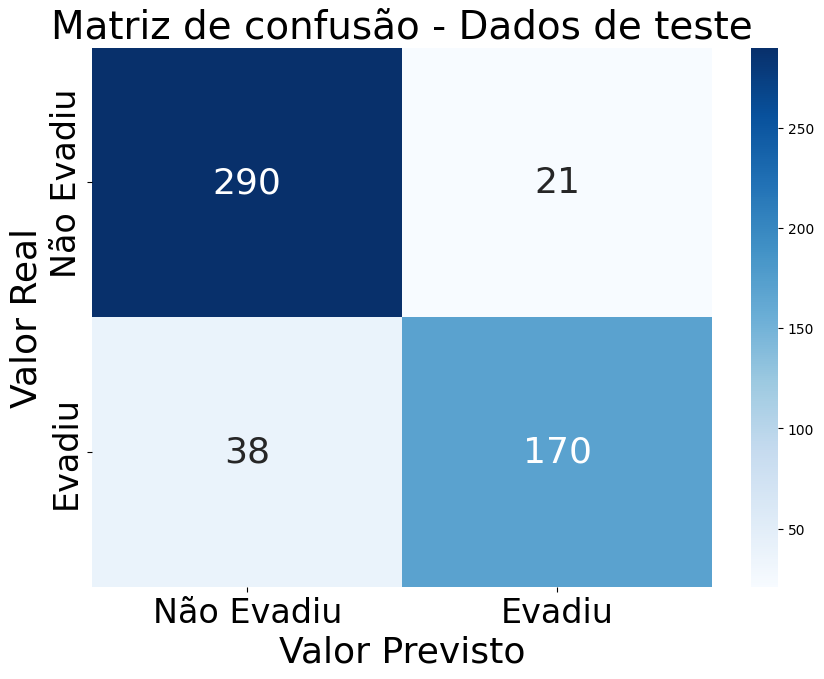

In [ ]:
def matriz_confusao(y_pred_test, y_test):
    # Calculando a matriz de confusão para os dados de teste
    matriz_confusao_teste = confusion_matrix(y_test, y_pred_test)

    # Transformando a matriz de confusão em um dataframe
    df_matriz_confusao_teste = pd.DataFrame(matriz_confusao_teste)

    fig, ax = plt.subplots(figsize=(10, 7)) # Apenas um gráfico

    # Dados de teste
    sns.heatmap(df_matriz_confusao_teste, cmap='Blues', annot=True, fmt='.0f', ax=ax, annot_kws={'size': 26})
    ax.set_title('Matriz de confusão - Dados de teste', size=28)
    ax.set_xlabel('Valor Previsto', size=26)
    ax.set_ylabel('Valor Real', size=26)
    ax.set_xticklabels(['Não Evadiu', 'Evadiu'], size=24)
    ax.set_yticklabels(['Não Evadiu', 'Evadiu'], size=24)

    plt.show()

matriz_confusao(y_pred, y_test)

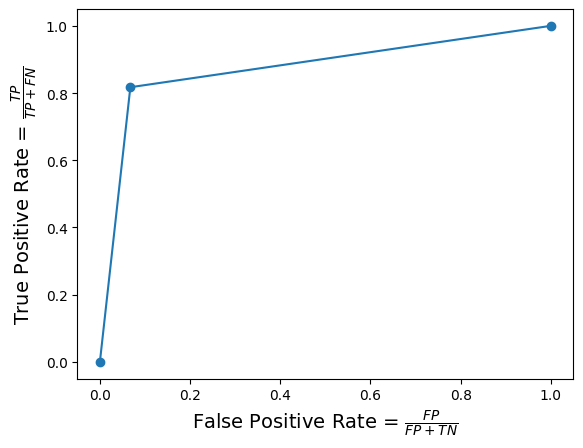

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, rhos = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.xlabel(r'False Positive Rate = $\frac{FP}{FP+TN}$', fontsize=14)
plt.ylabel(r'True Positive Rate = $\frac{TP}{TP + FN}$', fontsize=14);

In [ ]:
from sklearn.metrics import auc

print('AUC:', auc(fpr, tpr))

AUC: 0.8748917882760326


In [ ]:
importanc_cc = model.feature_importances_

df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importância': importanc_cc})

df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

df_importancias[["Feature", "Importância"]]

,Feature,Importância
4,CRA,0.315526
8,REPROVADA_POR_CURSADA_INF,0.285756
10,REPROVACAO_POR_CURSADA_ANO2,0.130344
7,REPROVADA_POR_CURSADA_MAT,0.096066
6,REPROVOU_FREQUENCIA,0.053893
9,REPROVACAO_POR_CURSADA_ANO1,0.049241
3,ANO,0.027226
5,ANO_INGRESSO,0.015840
1,NUM_VERSAO,0.008196
2,CH_TOTAL_VERSAO_CURSO,0.006825


Árvore:

In [ ]:
def modeling_arvore(X_train, y_train):
  model = DecisionTreeClassifier(random_state=42)

  f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro').mean()
  print(f"F1: {f1}")
  best_estimator = model_tuning(model, X_train, y_train)
  best = best_estimator.fit(X_train, y_train)
  return best

model = modeling_arvore(X, y)

F1: 0.8722964747951556


In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       311
           1       0.91      0.78      0.84       208

    accuracy                           0.88       519
   macro avg       0.88      0.86      0.87       519
weighted avg       0.88      0.88      0.88       519



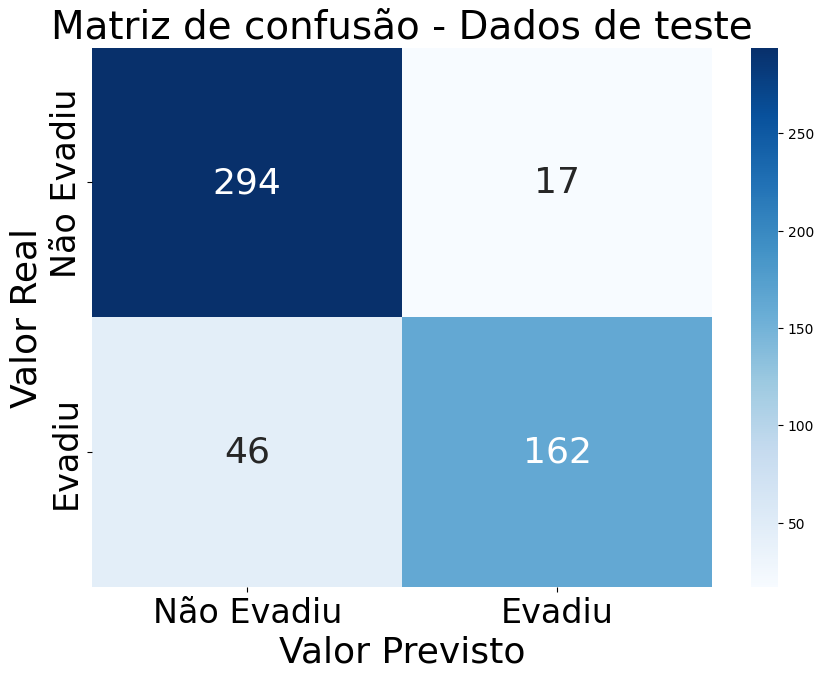

In [ ]:
matriz_confusao(y_pred, y_test)

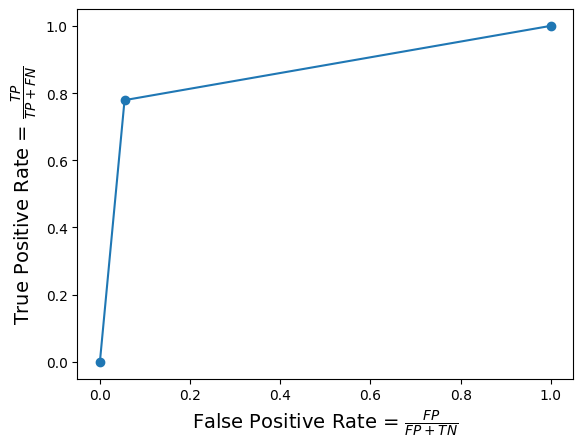

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, rhos = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.xlabel(r'False Positive Rate = $\frac{FP}{FP+TN}$', fontsize=14)
plt.ylabel(r'True Positive Rate = $\frac{TP}{TP + FN}$', fontsize=14);

In [ ]:
from sklearn.metrics import auc

print('AUC:', auc(fpr, tpr))

AUC: 0.862091887212466


In [ ]:
importanc_cc = model.feature_importances_

df_importancias = pd.DataFrame({'Feature': X_train.columns, 'Importância': importanc_cc})

df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

df_importancias[["Feature", "Importância"]]

,Feature,Importância
4,CRA,0.761335
8,REPROVADA_POR_CURSADA_INF,0.171715
6,REPROVOU_FREQUENCIA,0.031612
10,REPROVACAO_POR_CURSADA_ANO2,0.021189
5,ANO_INGRESSO,0.009652
3,ANO,0.004497
0,COD_CURSO,0.000000
1,NUM_VERSAO,0.000000
2,CH_TOTAL_VERSAO_CURSO,0.000000
7,REPROVADA_POR_CURSADA_MAT,0.000000


## Resultados

A floresta teve um resultado melhor do que a árvore, com F1 de 90% e o CRA foi a variável com maior importância.

## Conclusões e discussões

O estudo realizado forneceu insights valiosos sobre os fatores que influenciam a evasão nos cursos de Engenharia de Computação e Ciência da Computação na Universidade. Através da análise exploratória dos dados, foi possível distinguir padrões comportamentais entre os estudantes evadidos e formados. Notavelmente, as variáveis de reprovação em disciplinas de informática e a frequência de reprovações emergiram como indicadores significativos.

Os modelos de árvore de decisão e floresta aleatória provaram ser ferramentas eficientes na previsão de evasão, atingindo acurácias. Estes resultados sublinham a relevância das variáveis escolhidas na modelagem preditiva.

Contudo, é crucial reconhecer a complexidade do fenômeno da evasão, que é influenciado por uma variedade de fatores individuais, socioeconômicos e institucionais. Uma análise mais holística, incorporando mais dados socioeconômicos dos alunos, histórico educacional e características específicas dos cursos, é essencial para uma compreensão mais completa.